
# Purpose: Count images per emotion subfolder and draw a color-coded bar chart.

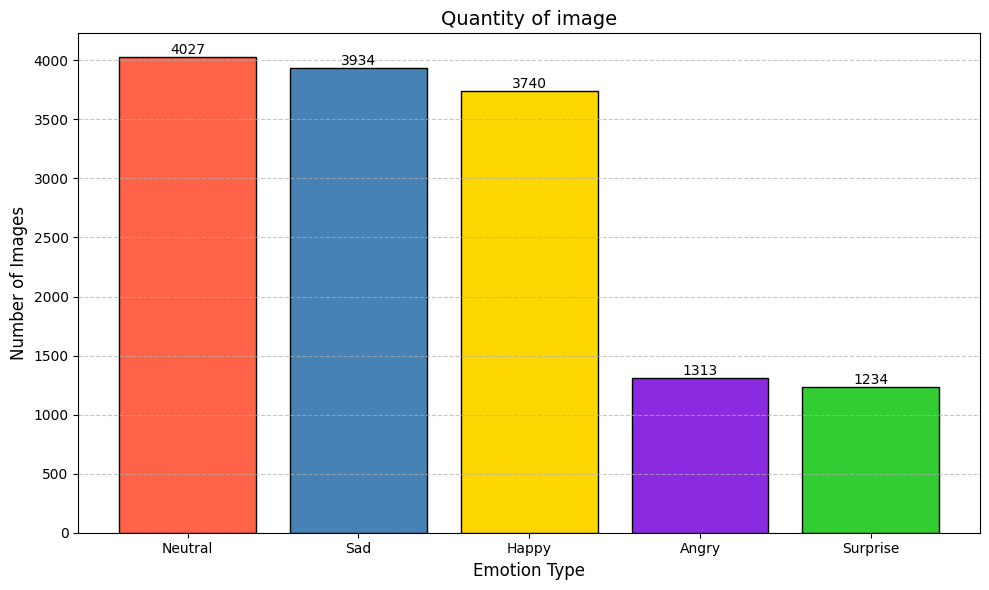

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np # Imported for color map fallback

def draw_emotion_distribution_colored(dataset_path):
    """
    Counts images in each subfolder and draws a color-coded bar chart.
    """
    # 1. Setup dictionary and valid extensions
    emotion_counts = {}
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')

    # 2. Iterate and count
    if not os.path.exists(dataset_path):
        print(f"Error: The path '{dataset_path}' does not exist.")
        return

    folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
    
    for folder in folders:
        folder_path = os.path.join(dataset_path, folder)
        files = [f for f in os.listdir(folder_path) if f.lower().endswith(valid_extensions)]
        emotion_counts[folder] = len(files)

    # 3. Sort data
    sorted_emotions = sorted(emotion_counts.items(), key=lambda item: item[1], reverse=True)
    if not sorted_emotions:
        print("No images found to plot.")
        return
    emotions = [item[0] for item in sorted_emotions]
    counts = [item[1] for item in sorted_emotions]

    # --- NEW: Define colors for each emotion ---
    # Define your desired colors here. You can use hex codes or names.
    color_palette = ['#FF6347', '#4682B4', '#FFD700', '#8A2BE2', '#32CD32']
    
    # Ensure we have a color for each bar, recycling if necessary
    bar_colors = [color_palette[i % len(color_palette)] for i in range(len(emotions))]

    # 4. Draw the Bar Chart with colors
    plt.figure(figsize=(10, 6))
    # Pass the list of colors to the 'color' argument
    bars = plt.bar(emotions, counts, color=bar_colors, edgecolor='black')

    plt.xlabel('Emotion Type', fontsize=12)
    plt.ylabel('Number of Images', fontsize=12)
    plt.title('Quantity of image', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add labels on top
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}',
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# --- USAGE ---
your_dataset_folder = r'D:\Projects\EmotionDetection\LearnData\Dataset\DatasetOriginal'
draw_emotion_distribution_colored(your_dataset_folder)

# Purpose: Count images across 'train', 'test', and 'val' folders and plot the aggregated distribution.

Scanning dataset at: D:\Projects\EmotionDetection\LearnData\Dataset
Total Counts per Emotion: {'Angry': 3293, 'Happy': 3740, 'Neutral': 4027, 'Sad': 3934, 'Surprise': 3280}


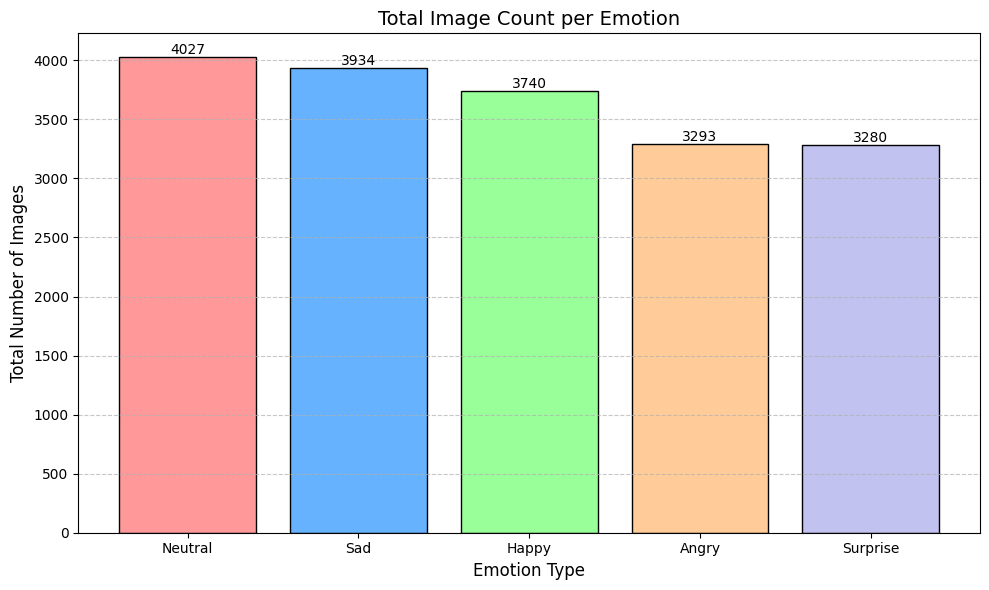

In [ ]:
import os
import matplotlib.pyplot as plt

def count_and_plot_emotions(dataset_path):
    """
    Counts images for each emotion across 'train', 'test', and 'val' folders
    and plots the total distribution.
    """
    # 1. Initialize a dictionary to store total counts for each emotion
    #    Structure: {'Happy': 100, 'Sad': 50, ...}
    emotion_totals = {}
    
    # The three main sub-directories
    subsets = ['train', 'test', 'val']
    
    # Valid image extensions
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')

    print(f"Scanning dataset at: {dataset_path}")

    # 2. Iterate through each subset (train, test, val)
    for subset in subsets:
        subset_path = os.path.join(dataset_path, subset)
        
        if not os.path.exists(subset_path):
            print(f"Warning: Folder '{subset}' not found in {dataset_path}")
            continue
            
        # List emotion folders inside the subset
        # e.g., subset_path/Happy, subset_path/Sad, etc.
        emotion_folders = [f for f in os.listdir(subset_path) if os.path.isdir(os.path.join(subset_path, f))]

        for emotion in emotion_folders:
            emotion_path = os.path.join(subset_path, emotion)
            
            # Count valid image files
            files = [f for f in os.listdir(emotion_path) if f.lower().endswith(valid_extensions)]
            count = len(files)
            
            # Add to total
            if emotion in emotion_totals:
                emotion_totals[emotion] += count
            else:
                emotion_totals[emotion] = count

    # 3. Check if we found any data
    if not emotion_totals:
        print("No images found. Please check the dataset path and structure.")
        return

    # 4. Sort data for plotting (Descending order)
    sorted_emotions = sorted(emotion_totals.items(), key=lambda item: item[1], reverse=True)
    emotions = [item[0] for item in sorted_emotions]
    counts = [item[1] for item in sorted_emotions]
    
    print("Total Counts per Emotion:", emotion_totals)

    # 5. Define Colors (one for each emotion)
    # You can add more hex codes if you have more than 5 emotions
    color_palette = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB3E6']
    bar_colors = [color_palette[i % len(color_palette)] for i in range(len(emotions))]

    # 6. Draw the Bar Chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(emotions, counts, color=bar_colors, edgecolor='black')

    plt.xlabel('Emotion Type', fontsize=12)
    plt.ylabel('Total Number of Images', fontsize=12)
    plt.title('Total Image Count per Emotion', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height}',
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# --- USAGE ---
# Replace this with the actual path to your main dataset folder
# The folder should contain 'train', 'test', and 'val' subfolders.
dataset_folder_path = r'D:\Projects\EmotionDetection\LearnData\Dataset'

count_and_plot_emotions(dataset_folder_path)

# Purpose: Split the dataset into Train/Val/Test using a reproducible seed.

In [ ]:
import splitfolders

# Path to source folder containing emotion subfolders
input_folder = "dataset" 

# Output folder that will be created with the split
output_folder = "new_dataset_split"

# Perform split using: Train 70%, Val 15%, Test 15%
print("⏳ Splitting dataset, please wait...")
splitfolders.ratio(
    input_folder, 
    output=output_folder, 
    seed=42,            # Fixed seed to reproduce the exact split
    ratio=(0.7, 0.15, 0.15), # Ratio (Train, Val, Test)
    group_prefix=None, 
    move=False # False = Copy files (keep originals), True = Move files (remove originals)
)
print("✅ Split complete!")